REGRESIÓN LINEAL:

In [20]:
# IMPORTS
%matplotlib inline  
import numpy as np  
from pylab import *
import matplotlib.pyplot as plt

In [6]:
# Generamos datos "aleatorios"  
altura = np.random.normal(170, 20, 1000)  
peso = altura / 2.5 + np.random.normal(0, 1, 1000)

In [7]:
#regresión lineal  
from scipy import stats  
slope, intercept, r_value, p_value, std_err = stats.linregress(altura, peso)

In [8]:
# MODELO DE PREDICCIÓN
def predict(x):  
    return slope * x + intercept

In [10]:
fitLine = predict(altura)

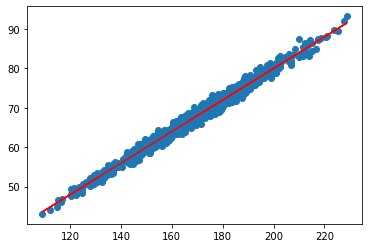

In [11]:
plt.scatter(altura, peso)  
plt.plot(altura, fitLine, c='r')  
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [1]:
ventas = pd.read_csv("ventas2.csv")
objetivo = "monto"
independientes = ventas.drop(columns=['monto']).columns

In [6]:
ventas

,edad,cantidad,vehiculo,pago,monto,ventas_prediccion
0,29,3,1,3,1181.36,890.676708
1,25,3,0,3,840.03,818.003538
2,49,3,1,2,736.96,858.478479
3,60,1,0,3,563.23,1058.515515
4,55,2,0,2,778.57,914.694844
5,35,2,1,1,586.81,1005.819924
6,51,2,1,2,606.61,996.577130
7,46,1,1,2,1349.92,1142.733758
8,27,2,1,2,296.02,1024.204479
9,27,2,0,3,1332.78,956.102189


In [3]:
modelo = LinearRegression()
modelo.fit(X=ventas[independientes], y=ventas[objetivo])

LinearRegression()

In [4]:
ventas["ventas_prediccion"] = modelo.predict(ventas[independientes])
preds = ventas[["monto", "ventas_prediccion"]].head(50)

In [5]:
talvez = modelo.predict([[41,1,1,1]])
print ("Tal vez compre: ")
print (talvez)

Tal vez compre: 
[1139.31401689]


/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


REGRESIÓN POLINÓMICA:

In [12]:
# creamos algunas muestras aleatorias, en las que el numero de ventas de productos  
# se reduzca a medida que aumenta su precio  
np.random.seed(2)  
itemPrices = np.random.normal(3.0, 1.0, 1000)  
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / itemPrices

In [14]:
# calculamos la curva polinomica de 4 grado que se ajusta a los datos  
# usando la funcion polyfit  
x = np.array(itemPrices)  
y = np.array(purchaseAmount)
p4 = np.poly1d(np.polyfit(x, y, 4))

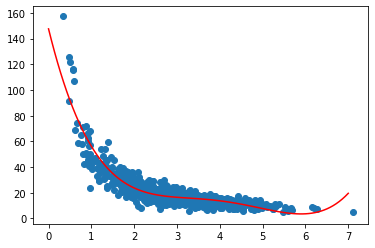

In [15]:
xp = np.linspace(0, 7, 100)  
plt.scatter(x, y)  
plt.plot(xp, p4(xp), c='r')  
plt.show() 

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))  
print(r2)

0.8293766396303073


LOGISTIC REGRESSION:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [14]:
# Generar datos simulados
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Etiquetas binarizadas basadas en una regla


In [15]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Crear el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)  # Entrenar el modelo

LogisticRegression()

In [17]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [18]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[18  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



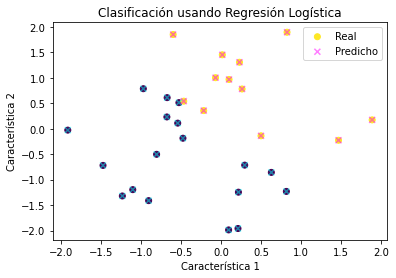

In [21]:
# Visualizar resultados
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label="Real")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='cool', marker='x', alpha=0.5, label="Predicho")
plt.legend()
plt.title("Clasificación usando Regresión Logística")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

K-VECINOS MÁS CERCANOS:

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score


In [24]:
# Generar datos de ejemplo
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)


In [25]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Crear el modelo KNN
k_values = list(range(1, 21))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())



In [34]:
k = k_values[scores.index(max(scores))]  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)  # Entrenar el modelo

7


KNeighborsClassifier(n_neighbors=7)

In [35]:
# Realizar predicciones
y_pred = knn.predict(X_test)


Accuracy: 0.85
Confusion Matrix:
 [[28  4]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



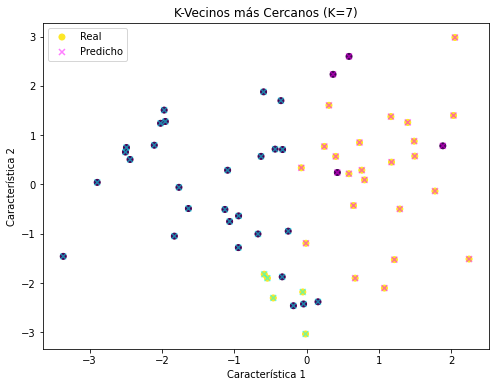

In [36]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizar la clasificación
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label="Real")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='cool', marker='x', alpha=0.5, label="Predicho")
plt.legend()
plt.title(f"K-Vecinos más Cercanos (K={k})")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

ARBOLES DE DECISIÓN:

In [9]:
# classification

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()


In [37]:
# regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [38]:
# Generar datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

In [39]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
# Crear el modelo DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [41]:
# Realizar predicciones
y_pred = tree_regressor.predict(X_test)


In [42]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrado medio (MSE):", mse)

Error cuadrado medio (MSE): 0.05054372017069523


In [43]:
# Visualizar el ajuste del modelo
X_grid = np.arange(0.0, 5.0, 0.01).reshape(-1, 1)
y_grid_pred = tree_regressor.predict(X_grid)

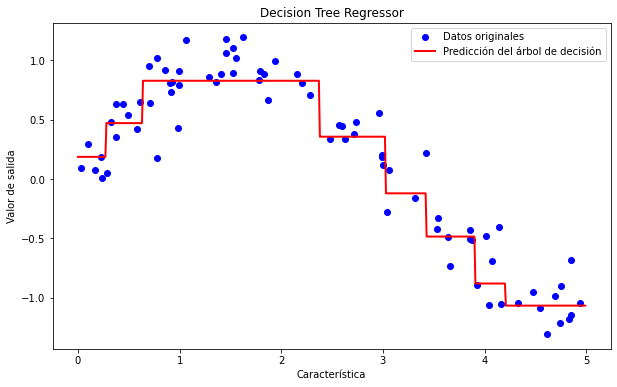

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Datos originales")
plt.plot(X_grid, y_grid_pred, color="red", linewidth=2, label="Predicción del árbol de decisión")
plt.title("Decision Tree Regressor")
plt.xlabel("Característica")
plt.ylabel("Valor de salida")
plt.legend()
plt.show()

BOSQUES ALEATORIOS:

In [10]:
# classification

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

# regression

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [45]:
# Generar datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

In [46]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Crear y entrenar el modelo RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [48]:
# Realizar predicciones
y_pred = forest_regressor.predict(X_test)

In [49]:

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrado medio (MSE):", mse)

Error cuadrado medio (MSE): 0.031160905393353144


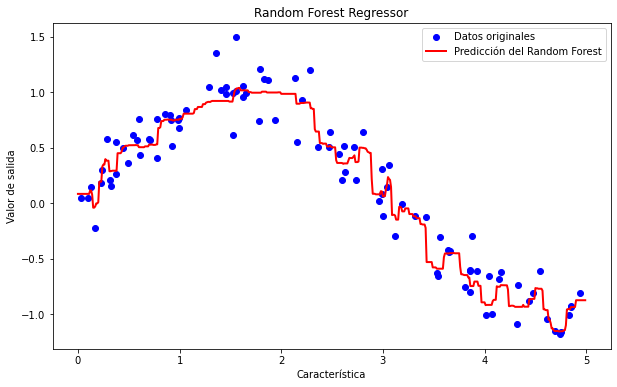

In [50]:
# Visualización del ajuste del modelo
X_grid = np.arange(0.0, 5.0, 0.01).reshape(-1, 1)
y_grid_pred = forest_regressor.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Datos originales")
plt.plot(X_grid, y_grid_pred, color="red", linewidth=2, label="Predicción del Random Forest")
plt.title("Random Forest Regressor")
plt.xlabel("Característica")
plt.ylabel("Valor de salida")
plt.legend()
plt.show()